In [13]:
import pandas as pd

In [14]:
df=pd.read_csv("D:\python/Uber_Request_Data.csv")

In [15]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


In [16]:
len(df["Request id"].unique())

6745

In [17]:
df.shape

(6745, 6)

In [18]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [19]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [21]:
df["Request timestamp"].value_counts()

15-07-2016 19:19    8
14-07-2016 17:34    7
15-07-2016 20:06    7
15-07-2016 20:54    7
11-07-2016 08:37    6
                   ..
13-07-2016 05:42    1
11-07-2016 16:34    1
14-07-2016 17:46    1
12-07-2016 14:00    1
12-07-2016 05:36    1
Name: Request timestamp, Length: 4016, dtype: int64

In [22]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [23]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [24]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [45]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [28]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:00
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [29]:
req_hour=df["Request timestamp"].dt.hour

In [30]:
len(req_hour)

6745

In [31]:
df["req_hour"]=req_hour

In [32]:
req_day=df["Request timestamp"].dt.day

In [33]:
df["req_day"]=req_day

In [34]:
import  seaborn as sns

In [35]:
import matplotlib.pyplot as plt

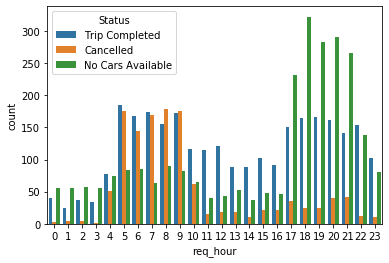

In [36]:
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

C:\Users\kumar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


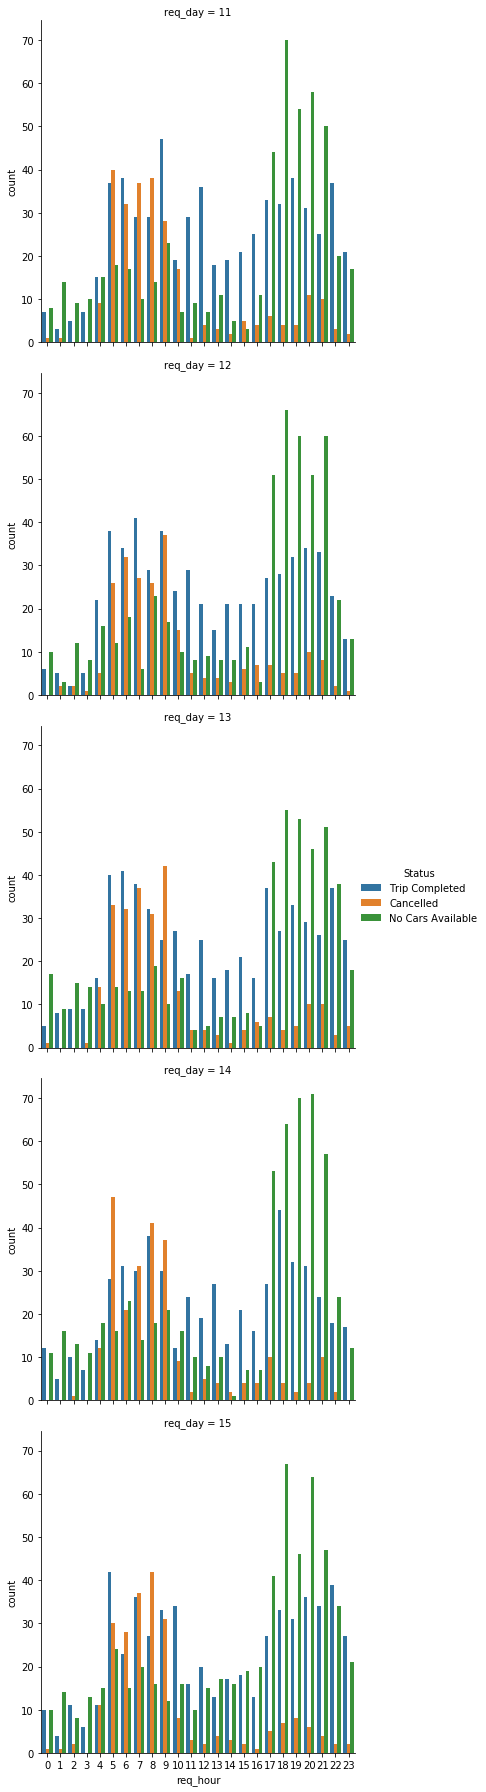

In [37]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Status",kind="count")
plt.show()

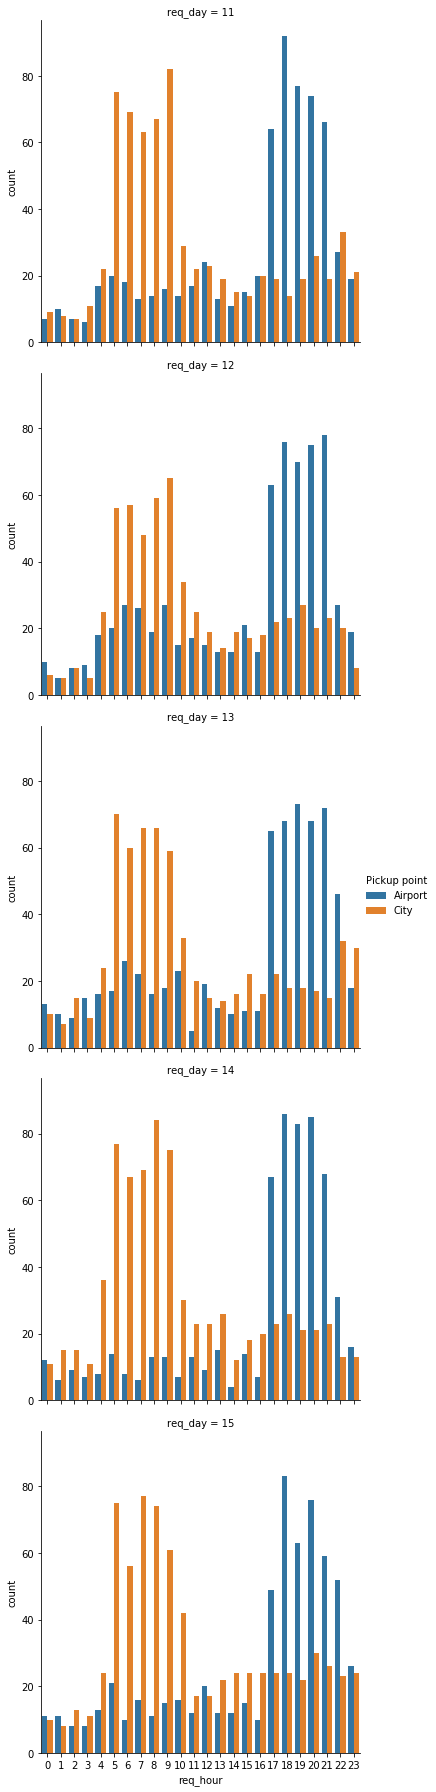

In [38]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Pickup point",kind="count")
plt.show()

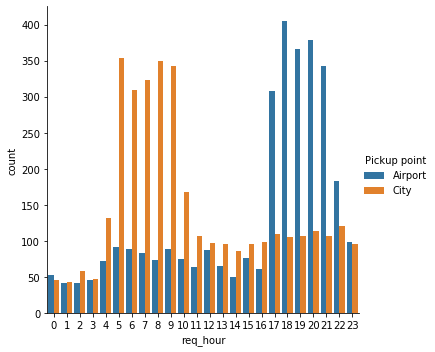

In [39]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [40]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,23,15


In [41]:
df["Time_Slot"]=0

In [42]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,23,15,0


In [43]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

####<5           "Pre_morning"
5<=x<10   == "Morning Rush"
10<=x<17     'Day_time'
17<=x<22     "Evening rush"
else         "Late night"

In [46]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,23,15,Late_Night


In [47]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

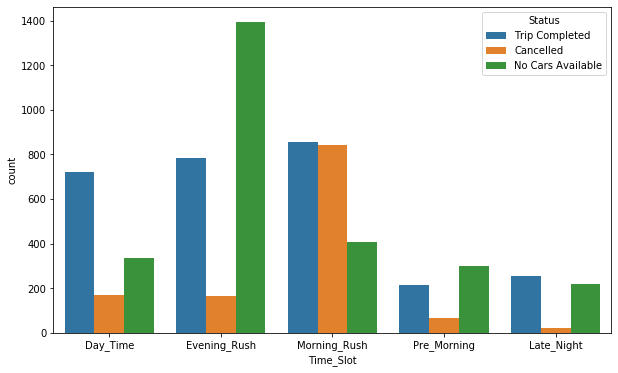

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

In [50]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:00,2016-07-14 07:13:00,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:00,2016-07-15 06:07:00,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:00,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:00,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:00,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:00,NaT,9,15,Morning_Rush


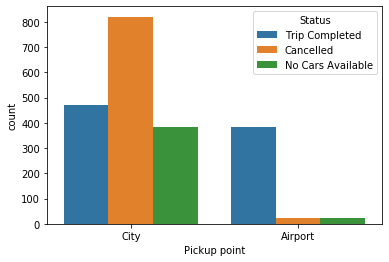

In [51]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

# Severity of problem by location and their count (cancellation of cab as per the pickup location at morning rush hours)

In [56]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
df_airport_cancelled

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2841,1867,Airport,3.0,Cancelled,2016-07-12 09:59:00,NaT,9,12,Morning_Rush
2909,1462,Airport,23.0,Cancelled,2016-07-12 05:01:00,NaT,5,12,Morning_Rush
2910,196,Airport,24.0,Cancelled,2016-07-11 06:07:00,NaT,6,11,Morning_Rush
2944,5847,Airport,31.0,Cancelled,2016-07-15 09:05:00,NaT,9,15,Morning_Rush
3130,2844,Airport,74.0,Cancelled,2016-07-13 05:28:00,NaT,5,13,Morning_Rush
3157,5806,Airport,81.0,Cancelled,2016-07-15 08:46:00,NaT,8,15,Morning_Rush
3202,3018,Airport,92.0,Cancelled,2016-07-13 07:27:00,NaT,7,13,Morning_Rush
3254,5854,Airport,103.0,Cancelled,2016-07-15 09:09:00,NaT,9,15,Morning_Rush
3315,174,Airport,119.0,Cancelled,2016-07-11 05:44:00,NaT,5,11,Morning_Rush
3349,1776,Airport,128.0,Cancelled,2016-07-12 09:02:00,NaT,9,12,Morning_Rush


In [53]:
df_airport_cancelled.shape[0]

23

In [57]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]
df_city_cancelled

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:00,NaT,6,13,Morning_Rush
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:00,NaT,8,14,Morning_Rush
2842,4383,City,3.0,Cancelled,2016-07-14 07:48:00,NaT,7,14,Morning_Rush
2846,4280,City,4.0,Cancelled,2016-07-14 06:33:00,NaT,6,14,Morning_Rush
2847,4533,City,4.0,Cancelled,2016-07-14 09:31:00,NaT,9,14,Morning_Rush
...,...,...,...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,2016-07-12 07:20:00,NaT,7,12,Morning_Rush
4091,4158,City,299.0,Cancelled,2016-07-14 05:03:00,NaT,5,14,Morning_Rush
4092,4164,City,299.0,Cancelled,2016-07-14 05:06:00,NaT,5,14,Morning_Rush
4093,4448,City,299.0,Cancelled,2016-07-14 08:30:00,NaT,8,14,Morning_Rush


In [55]:
df_city_cancelled.shape[0]

820

# Supply and demand for morning rush

In [58]:
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:00,2016-07-14 07:13:00,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:00,2016-07-15 06:07:00,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:00,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:00,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:00,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:00,NaT,9,15,Morning_Rush


# Morning Rush- City

In [59]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [77]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

In [60]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [78]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

# Morning Rush- Airport

In [61]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [79]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [62]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [80]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

# Evening Rush- City

In [85]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [86]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [87]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [88]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

# Evening Rush- Airport

In [81]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [82]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [83]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [84]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

# Pie Chart for evening rush- City

In [89]:
df_evening_city= df.loc[(df["Pickup point"]=="City")&(df["Time_Slot"]=="Evening_Rush")]

In [96]:
df_evening_city_counts= pd.DataFrame(df_evening_city["Status"].value_counts())
df_evening_city_counts

,Status
Trip Completed,411
No Cars Available,71
Cancelled,60


In [98]:
df_evening_city_counts["Status"].values

array([411,  71,  60], dtype=int64)

In [99]:
df_evening_city_counts["Status"].index

Index(['Trip Completed', 'No Cars Available', 'Cancelled'], dtype='object')

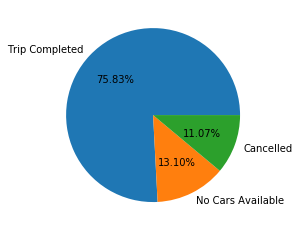

In [102]:
fig,ax= plt.subplots()
ax.pie(df_evening_city_counts["Status"].values,labels= df_evening_city_counts["Status"].index,autopct="%.2f%%")
plt.show()

# Pie Chart for morning rush- City

In [103]:
df_morning_city= df.loc[(df["Pickup point"]=="City")&(df["Time_Slot"]=="Morning_Rush")]

In [104]:
df_morning_city_counts= pd.DataFrame(df_morning_city["Status"].value_counts())
df_morning_city_counts

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [105]:
df_morning_city_counts["Status"].values

array([820, 472, 385], dtype=int64)

In [106]:
df_morning_city_counts["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

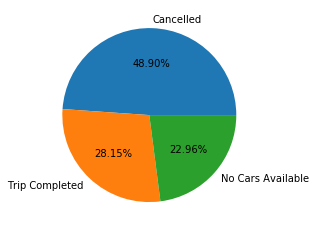

In [107]:
fig,ax= plt.subplots()
ax.pie(df_morning_city_counts["Status"].values,labels= df_morning_city_counts["Status"].index,autopct="%.2f%%")
plt.show()

In [122]:
###


# Pie Chart for evening rush - Airport

In [108]:
df_evening_Airport= df.loc[(df["Pickup point"]=="Airport")&(df["Time_Slot"]=="Evening_Rush")]

In [110]:
df_evening_Airport_counts= pd.DataFrame(df_evening_Airport["Status"].value_counts())
df_evening_Airport_counts

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [111]:
df_evening_Airport_counts["Status"].values

array([1321,  373,  106], dtype=int64)

In [112]:
df_evening_Airport_counts["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

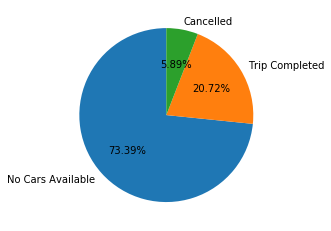

In [119]:
fig,ax= plt.subplots()
ax.pie(df_evening_Airport_counts["Status"].values,labels= df_evening_Airport_counts["Status"].index,autopct="%.2f%%",startangle= 90)
plt.show()

# Pie Chart for Morning rush - Airport

In [114]:
df_morning_Airport= df.loc[(df["Pickup point"]=="Airport")&(df["Time_Slot"]=="Morning_Rush")]

In [115]:
df_morning_Airport_counts= pd.DataFrame(df_morning_Airport["Status"].value_counts())
df_morning_Airport_counts

,Status
Trip Completed,382
Cancelled,23
No Cars Available,21


In [116]:
df_morning_Airport_counts["Status"].values

array([382,  23,  21], dtype=int64)

In [117]:
df_morning_Airport_counts["Status"].index

Index(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype='object')

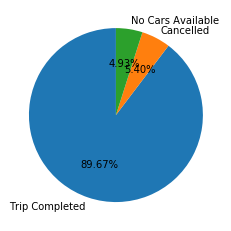

In [121]:
fig,ax= plt.subplots()
ax.pie(df_morning_Airport_counts["Status"].values,labels= df_morning_Airport_counts["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

In [126]:
# Inferences
#1. They could be given a bonus for each trip they complete from the city to the airport in the morning rush. This will ensure that less number of trips are cancelled.

#2. Uber can pay for the gas mileage of drivers to come back to the city without a ride

#3. Drivers can again be given bonus to complete a trip from the airport in the evening. This will ensure that the supply increase at the airport.

#4. Uber can also pay drivers to come without a passenger to the airport.

#5. Another way could be to increase licenses of car pooling taxis so that lesser number of cars can serve more passengers.

# Supply and Demand for evening rush

In [64]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']

df_evening_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:00,2016-07-13 22:28:00,21,13,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:00,2016-07-15 18:50:00,17,15,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:00,2016-07-13 18:20:00,17,13,Evening_Rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:00,NaT,21,15,Evening_Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:00,NaT,21,15,Evening_Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:00,NaT,21,15,Evening_Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,15,Evening_Rush


In [65]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]
df_city_cancelled

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:00,NaT,17,14,Evening_Rush
2864,3549,City,9.0,Cancelled,2016-07-13 18:03:00,NaT,18,13,Evening_Rush
2871,3499,City,13.0,Cancelled,2016-07-13 17:46:00,NaT,17,13,Evening_Rush
2881,3810,City,16.0,Cancelled,2016-07-13 21:06:00,NaT,21,13,Evening_Rush
2892,4968,City,19.0,Cancelled,2016-07-14 18:40:00,NaT,18,14,Evening_Rush
2950,2305,City,33.0,Cancelled,2016-07-12 18:56:00,NaT,18,12,Evening_Rush
2958,2530,City,35.0,Cancelled,2016-07-12 21:07:00,NaT,21,12,Evening_Rush
2959,2596,City,35.0,Cancelled,2016-07-12 21:53:00,NaT,21,12,Evening_Rush
2984,2206,City,40.0,Cancelled,2016-07-12 17:55:00,NaT,17,12,Evening_Rush
2987,2131,City,41.0,Cancelled,2016-07-12 17:04:00,NaT,17,12,Evening_Rush


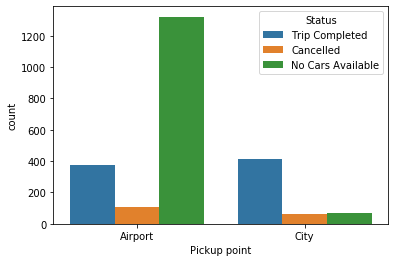

In [66]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [67]:
df_city_cancelled.shape[0]

60

In [68]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

# Supply Demand gap for morning rush

In [128]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:00,2016-07-14 07:13:00,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:00,2016-07-15 06:07:00,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:00,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:00,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:00,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:00,NaT,9,15,Morning_Rush


In [129]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]
df_city_cancelled

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:00,NaT,6,13,Morning_Rush
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:00,NaT,8,14,Morning_Rush
2842,4383,City,3.0,Cancelled,2016-07-14 07:48:00,NaT,7,14,Morning_Rush
2846,4280,City,4.0,Cancelled,2016-07-14 06:33:00,NaT,6,14,Morning_Rush
2847,4533,City,4.0,Cancelled,2016-07-14 09:31:00,NaT,9,14,Morning_Rush
...,...,...,...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,2016-07-12 07:20:00,NaT,7,12,Morning_Rush
4091,4158,City,299.0,Cancelled,2016-07-14 05:03:00,NaT,5,14,Morning_Rush
4092,4164,City,299.0,Cancelled,2016-07-14 05:06:00,NaT,5,14,Morning_Rush
4093,4448,City,299.0,Cancelled,2016-07-14 08:30:00,NaT,8,14,Morning_Rush


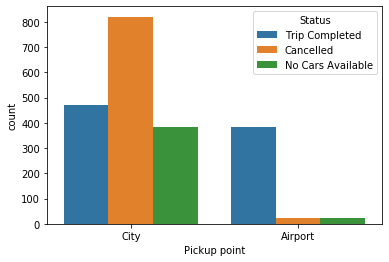

In [130]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

In [131]:
df_city_cancelled.shape[0]

820

In [132]:
df_morning_rush["Status"].value_counts()

Trip Completed       854
Cancelled            843
No Cars Available    406
Name: Status, dtype: int64

# Severity problem at each location by looking at cancellation of cabs in each of the pickup location

In [73]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [74]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

# Severity of problem by location in morning rush

In [75]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [76]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820